## MIS 776 Homework 2: Regression
### Housing Data:
Predicting median home prices in various Boston, MA neighborhoods

### Question 2: 
#### a) Creating Notebook and data frame from data file

In [2]:
#loading needed libraries
!pip install seaborn -q
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
#allow plot viewing in notebook
%matplotlib inline

#load regression libraries/modules needed
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import os #for accessing data file

In [3]:
#get the file path and data file
#DATA_DIR = 'Y:/Fall 2019/MIS 776/Assignments/Homework 2'
DATA_DIR = ''
FILE_NAME = 'Housing.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
datHousing = pd.read_csv(data_path)
#show header to confirm
datHousing.head() 

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
0,3.32105,0.0,19.58,Yes,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4
1,1.12658,0.0,19.58,Yes,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3
2,1.41385,0.0,19.58,Yes,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0
3,3.53501,0.0,19.58,Yes,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6
4,1.27346,0.0,19.58,Yes,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0


In [4]:
#get the dimensions of the dataset
datHousing.shape

(506, 13)

#### b) Exploratory Analysis on Housing Data
Includes summary statistics for all the variables given  

In [5]:
#Separate categorical and numerical variables
num_features = []
#get features
for col in datHousing.columns:
    if col != 'RIVER': num_features.append(col)

#descriptive statistics for categorical feature RIVER
datHousing['RIVER'].describe()

count     506
unique      2
top        No
freq      471
Name: RIVER, dtype: object

##### Categorical Features = RIVER
- **Box and whisker plot** using median home value as exploratory variable because we are predicting it later.  
- **Distribution** of homes' proximity to the Charles River. Tells us that only **~7%** of housing developments are bordered by the Charles River which explains a little bit why the box plots distribution is more concisely defined for the 'yes' tracts.

     count  percent
No     471     93.1
Yes     35      6.9


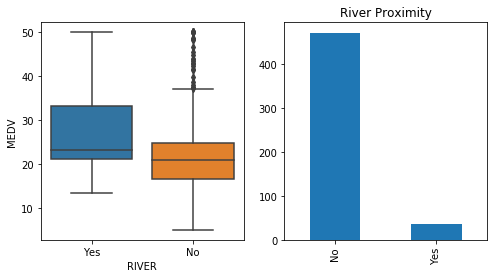

In [6]:
#box and whisker plot for the categorical variable
fig, (ax1, ax2) = plt.subplots(figsize=(8,4), ncols=2)
sns.boxplot(x='RIVER', y='MEDV', data=datHousing, ax=ax1)
#get the count for the category
count = datHousing['RIVER'].value_counts()
percent = 100*datHousing['RIVER'].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title='River Proximity', ax=ax2);

##### Numerical Features:

In [7]:
#descriptive statistics for the numerical features
datHousing[num_features].describe().round()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,4.0,11.0,11.0,1.0,6.0,69.0,4.0,10.0,408.0,18.0,13.0,23.0
std,9.0,23.0,7.0,0.0,1.0,28.0,2.0,9.0,169.0,2.0,7.0,9.0
min,0.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,187.0,13.0,2.0,5.0
25%,0.0,0.0,5.0,0.0,6.0,45.0,2.0,4.0,279.0,17.0,7.0,17.0
50%,0.0,0.0,10.0,1.0,6.0,78.0,3.0,5.0,330.0,19.0,11.0,21.0
75%,4.0,12.0,18.0,1.0,7.0,94.0,5.0,24.0,666.0,20.0,17.0,25.0
max,89.0,100.0,28.0,1.0,9.0,100.0,12.0,24.0,711.0,22.0,38.0,50.0


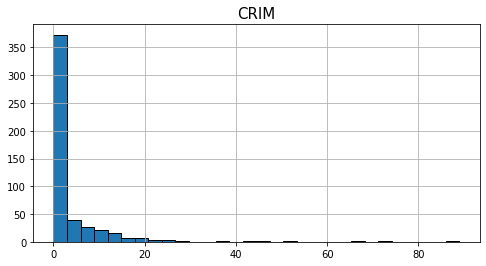

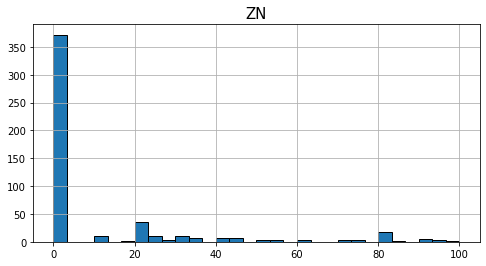

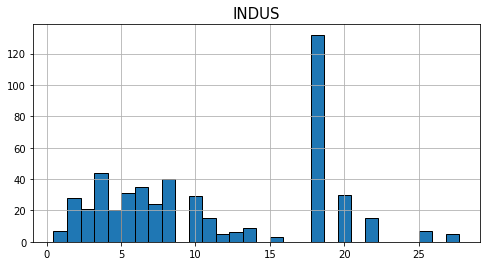

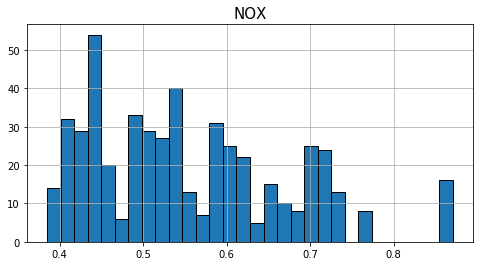

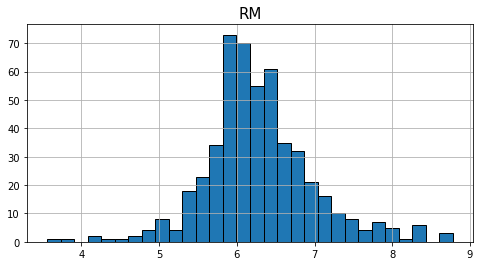

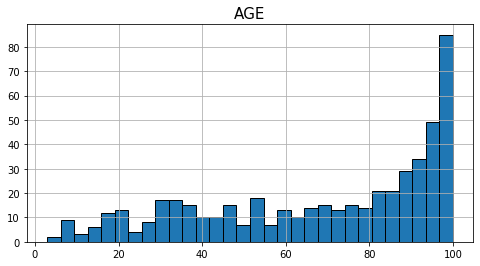

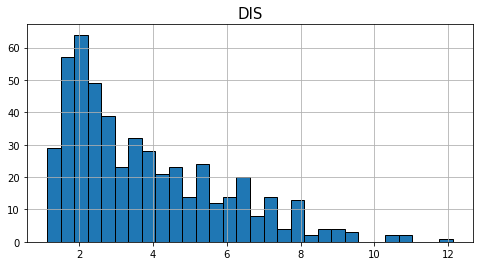

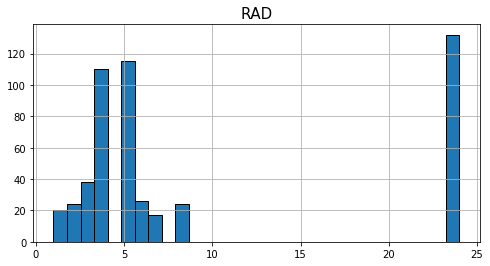

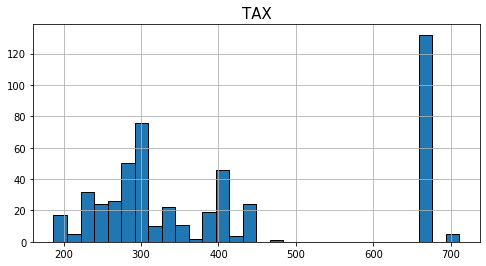

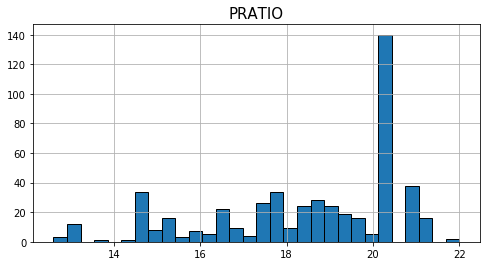

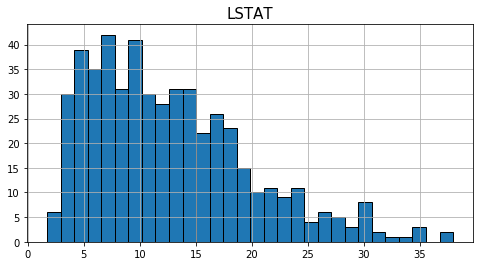

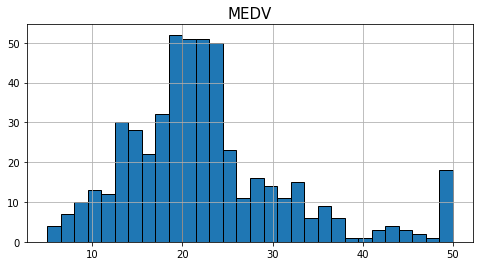

In [8]:
#plots for all the numerical and categorical features
for feature in num_features:
    fig, ax = plt.subplots(figsize=(8,4))
    datHousing[feature].hist(bins=30, edgecolor='k', ax=ax)
    ax.set_title(feature, size=15)

In [9]:
meanMEDV = datHousing['MEDV'].mean()
print('The mean value of MEDV is ' + str(round(meanMEDV, 4)))

The mean value of MEDV is 22.5328


### Question 3:
#### Adding and verifying a dummy variable for categorical variable RIVER

In [10]:
#one-hot encoding.. Yes = 1, No = 0
#create a dataframe of the dummies and add it to the existing dataframe
datRiver = pd.get_dummies(datHousing['RIVER'], prefix='RIVER', drop_first=True)
datHousing = pd.concat([datHousing, datRiver], axis=1)

#change the column name for the new dummy column
datHousing.rename(columns={'RIVER_Yes':'RIVERCODE'}, inplace=True)

#review columns and verifying addition
datHousing.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV,RIVERCODE
0,3.32105,0.0,19.58,Yes,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4,1
1,1.12658,0.0,19.58,Yes,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3,1
2,1.41385,0.0,19.58,Yes,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0,1
3,3.53501,0.0,19.58,Yes,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6,1
4,1.27346,0.0,19.58,Yes,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0,1


In [11]:
#check the mean for newly added variable. Should be 0.069
datHousing['RIVERCODE'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: RIVERCODE, dtype: float64

Verified! The mean for RIVERCODE is **0.069** above.

### Question 4:
#### a) Correlation table of all numerical variables

In [12]:
#add RIVERCODE to list of numerical features
num_features.append('RIVERCODE')

#create correlation table for all variables
corrHousing = datHousing[num_features].corr()
corrHousing

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV,RIVERCODE
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.055892
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.042697
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.062938
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.091203
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.091251
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.086518
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.099176
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.007368
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.035587
PRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044,-0.507787,-0.121515


#### b) Review for multicollinearity issues 
**The highest** correlation between variables is with the *TAX (full-value property-tax rate per $10,000)* and *RAD (index of accessibility to radial highways)* variables at **0.910228**. This relationship might bring about multicollinearity issues because they are explaining variation of a latent measure. For example, below we will look at median home value where as this relationship could be explaining value of a residential neighborhood or not living in a (road) noisy neighborhood. 


##### c) Principal Component Analysis:

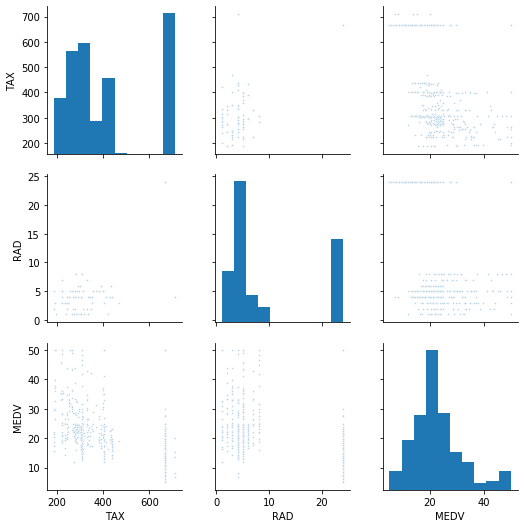

In [13]:
#check how TAX and RAD are related to MEDV
sns.pairplot(datHousing[['TAX', 'RAD', 'MEDV']], plot_kws={'s':2})

We *could* do a principal component analysis and extract the useful variation from RAD and TAX and use that in our model of interest to predict MEDV. Also, another solution would be to drop RAD since it is less correlated to MEDV relative to TAX. Below (questions 6-7), there are two models. One where it is dropped and one where it is not to see if the model is highly affected.

**Another option:** Drop TAX instead

#### c) Predictors' relationships with MEDV

In [14]:
#From the correlation dataframe, keep just the MEDV relationships
corrHousing['MEDV'].sort_values()

LSTAT       -0.737663
PRATIO      -0.507787
INDUS       -0.483725
TAX         -0.468536
NOX         -0.427321
CRIM        -0.388305
RAD         -0.381626
AGE         -0.376955
RIVERCODE    0.175260
DIS          0.249929
ZN           0.360445
RM           0.695360
MEDV         1.000000
Name: MEDV, dtype: float64

##### Highest correlated with median home value:
- LSTAT: % lower status of the population
- RM: average number of rooms per dwelling 
- PRATIO: pupil-teacher ratio by town 

##### Lowest correlated with median home value:
- RIVERCODE: 1 if the tract is bordered by the Charles river, 0 if not
- DIS: weighted distances to five Boston employment centres 
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 

##### Why is it important to know this?
Knowing the other variables' relationships with MEDV allows us to discern which ones to include, exclude, or combine into a principal component to create any proposed model of estimation.

### Question 5: 
#### a) Correlation plot matrix with focus on MEDV relationships

In [ ]:
#pairplot for all variables
datHousing = datHousing[num_features]
sns.pairplot(datHousing[num_features], plot_kws={"s": 2}, diag_kind='kde')

**Heteroscedasticity issues:** Some of the variables which have a relationship with median home value don't have a completely linear relationship, and have some outliers. This may cause differences in the variance between the residuals from the predicted values. An example is the relationship with TAX and RAD.  
**Non linear relationships:** Variables like RIVERCODE (proximity to Charles River) and CRIM (per capita rate by town) seem to have relatively non-linear relationships and in the case of RIVERCODE, almost no relationship to the median home value. This may add some noise that affects the model variation if included (if they are strongly correlated with other variables that are also strongly correlated to MEDV)


### Question 6:
#### a) Regression model predicting median home value
\begin{align*}
\hat{MEDV_i} & = f(CRIM, ZN, INDUS, NOX , RM, AGE, DIS, RAD, TAX, PRATIO, LSTAT, RIVERCODE, \varepsilon_i)
\end{align*}

***- Setting up dependent and independent features***

In [16]:
#select predictor variables
X = datHousing.drop(['MEDV'], axis=1) #drop y variable
Y = datHousing['MEDV']
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,RIVERCODE
0,3.32105,0.0,19.58,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,1
1,1.12658,0.0,19.58,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,1
2,1.41385,0.0,19.58,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,1
3,3.53501,0.0,19.58,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,1
4,1.27346,0.0,19.58,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,1


***- Spliting the data to get training and testing data***

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=123)
x_train
x_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,RIVERCODE
185,1.49632,0.0,19.58,0.871,5.404,100.0,1.5916,5,403,14.7,13.28,0
13,0.11069,0.0,13.89,0.550,5.951,93.8,2.8893,5,276,16.4,17.92,1
383,7.99248,0.0,18.10,0.700,5.520,100.0,1.5331,24,666,20.2,24.56,0
171,0.32264,0.0,21.89,0.624,5.942,93.5,1.9669,4,437,21.2,16.90,0
446,6.28807,0.0,18.10,0.740,6.341,96.4,2.0720,24,666,20.2,17.79,0


***- Creating and running the regression***

In [18]:
#create a regression instance
reg = LinearRegression()
#Fit the training data to the regression
reg.fit(x_train, y_train)
#Predict yhat values from the training data
y_hat = reg.predict(x_train)

### Question 7:
#### Summary of regression model with RAD

In [19]:
#Get the regression coefficients for the model's predictors
cons = reg.intercept_
coefs = pd.Series(reg.coef_, index=x_train.columns).sort_values(ascending=False).round(6)
coefs = pd.DataFrame(data=coefs)
#Organize and display the coefficients for all predictors
coefs.rename(columns={0:'C'}, inplace=True)
coefs

,C
RM,3.964676
RIVERCODE,1.408463
RAD,0.262413
ZN,0.045261
INDUS,0.011465
AGE,0.000029
TAX,-0.014130
CRIM,-0.101206
LSTAT,-0.474558
PRATIO,-1.000413


##### a) Percentage of variance in MEDV explained by the model

In [20]:
#Calculate the R-Square value
a = 'The proportion of variation in median home value attributable to the model predictors is '\
'***${:,.2f}$%***  '.format(r2_score(y_train, y_hat)*100)
b = '**b) All other things constant,** being by the Charles River increases the median home value '\
'by about **<u>$\${:,.2f}$</u>**  '.format(coefs.at['RIVERCODE','C']*1000)
c = '**c) Effect of home age** seems to be negligible. The home value rises about '\
'<u>$\${:,.3f}$</u> with increasing proportion of units built before 1940.'.format(coefs.at['AGE','C']*1000)
md(a + '\n' + b + '\n' + c)

The proportion of variation in median home value attributable to the model predictors is ***$76.10$%***  
**b) All other things constant,** being by the Charles River increases the median home value by about **<u>$\$1,408.46$</u>**  
**c) Effect of home age** seems to be negligible. The home value rises about <u>$\$0.029$</u> with increasing proportion of units built before 1940.

#### Summary of regression without RAD

In [21]:
#Adjust list of predictor variables
x_train.drop(['RAD'], axis=1, inplace=True)
#Fit the training data to the regression
reg.fit(x_train, y_train)
#Predict yhat values from the training data
y_hat2 = reg.predict(x_train)

#Get the regression coefficients for the model's predictors
coefs_RAD = pd.Series(reg.coef_, index=x_train.columns).sort_values(ascending=False).round(6)
coefs_RAD = pd.DataFrame(data=coefs_RAD)
coefs_RAD

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,0
RM,4.282206
RIVERCODE,1.758922
ZN,0.038085
TAX,-0.002332
AGE,-0.005452
INDUS,-0.056965
CRIM,-0.064608
LSTAT,-0.459870
PRATIO,-0.910637
DIS,-1.393336


In [22]:
#Calculate the R-Square value
a_rad = 'Now without the RAD predictor, the proportion of variation in median home value attributable to the model predictors is \
***${:.2f}$%***'.format(r2_score(y_train, y_hat2)*100)
b_rad = '**The effect of being by the river** is now expected to increase home value by **$\${:,.2f}$**.'.format(coefs_RAD.at['RIVERCODE',0]*1000)
c_rad = '**The effect of home age** is still small but now ***reduces*** price by an average of **<u>$\${:,.2f}$</u>**.'.format(coefs_RAD.at['AGE',0]*-1000)
md(a_rad + '  \n' + b_rad + '  \n' + c_rad)

Now without the RAD predictor, the proportion of variation in median home value attributable to the model predictors is ***$75.22$%***  
**The effect of being by the river** is now expected to increase home value by **$\$1,758.92$**.  
**The effect of home age** is still small but now ***reduces*** price by an average of **<u>$\$5.45$</u>**.

From the above comparison, removing RAD does not have a relatively large effect on changing river proximity (although $300 might be argued to be a lot) and age effects. If a cut-off value of importance in the impact of a feature like river proximity is defined, then a decision can be made on whether PCA is essential for this model. For this particular question, we proceed with the model that includes RAD.

### Question 8:
##### Regression equation inferred by the model:
The model displayed below is one where all variables have been included:

In [28]:
x_names = coefs.index.values
x_vals = coefs['C'].tolist()

res = '\hat MEDV_i = {} + {}{} + {}{} + {}{} + {}{} + {}{} + {}{} + {}{} + {}{} +  {}{} + {}{} + {}{} + {}{}'\
.format(cons.round(3), x_vals[0],x_names[0], x_vals[1],x_names[1],x_vals[2],x_names[2],x_vals[3],x_names[3], x_vals[4],\
        x_names[4], x_vals[5],x_names[5], x_vals[6],x_names[6], x_vals[7],x_names[7], x_vals[8],x_names[8], \
       x_vals[9],x_names[9], x_vals[10],x_names[10], x_vals[11],x_names[11])

md('##### Model inferred here is:  $$ ' + res + ' $$')

##### Model inferred here is:  $$ \hat MEDV_i = 39.826 + 3.964676RM + 1.408463RIVERCODE + 0.262413RAD + 0.045261ZN + 0.011465INDUS + 2.9e-05AGE + -0.01413TAX + -0.101206CRIM +  -0.474558LSTAT + -1.000413PRATIO + -1.390646DIS + -17.524602NOX $$

##### Comparison of Predicted and Actual Values

AttributeError: 'float' object has no attribute 'round'

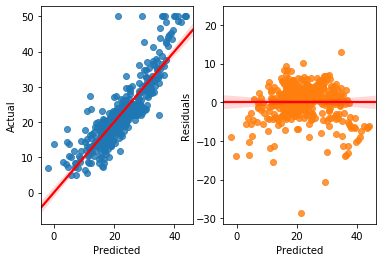

In [30]:
#get the two y values on a dataframe
comp = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat}) 
comp['Residuals'] = comp['Predicted'] - comp['Actual']
#plot actual and predicted values to compare
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.regplot(x=comp['Predicted'], y=comp['Actual'], data=comp, line_kws={'color': 'red'}, ax=ax1);
sns.regplot(x=comp['Predicted'], y=comp['Residuals'], data=comp, line_kws={'color': 'red'}, ax=ax2);
#calculate and display variance for actual vs. predicted values
var_actual = np.var(comp['Actual'])
var_pred = np.var(comp['Predicted'])
diff = var_pred/var_actual
print('Actual variance: ', var_actual.round(4), '    Model variance: ', var_pred.round(4), '  Factor(R^2): ', diff)

From above, most of the residual values seem to be within the same range in variation implying there is some level of heteroskedasticity. There are a few outliers on the plots, but most of the points follow the OLS curve for the actual values, and are within the same vicinity for the residuals.

### Question 9:
##### Median home value given the following values for the other variables:
a.	CRIM = 1.28955  
b.	ZN = 0  
c.	INDUS = 18  
d.	RIVER = Yes (RIVERCODE = 1)    
e.	NOX = 0.862  
f.	RM = 5.22  
g.	AGE = 65.2  
h.	DIS = 2.05  
i.	RAD = 5  
j.	TAX = 399  
k.	PRATIO = 13.9  
l.	LSTAT = 18.3

In [31]:
#values organized as seen in the model above
vals = [5.22, 1, 5, 0, 18, 65.2, 399, 1.28955, 18.3, 13.9, 2.05, 0.862]
x_coefs = [float(i) for i in x_vals]
y_pred = cons #start with constant
#calculate each value by its coefficient
calcs = [a*b for a,b in zip(vals, x_coefs)] 
#add the values to the constant value (intercept)
for x in calcs:
    y_pred += x
#display y_pred
md('The expected median home value given the above parameters is **$\${:,.2f}$**'.format((y_pred*1000)))

The expected median home value given the above parameters is **$\$17,134.86$**

## Some Notes:
Adjusted R-squared: Penalty for each additional predictor (might make it worse)